# Voice Identification

### n-shot learning

The idea of one shot learning is to train an algorithm so that after only `n` examples, an algorithm can identify a example again. 

Siamese networks attempt to do this by training a model to learn how to take a high dimensional input an generate a feature vector. The network is trained by taking two examples either similar or different and training them to reduce/increase the distance of the feature vector generated by the output.

### Applying to Voice Identification

The end goal of this model is to take a audio sample that has undergone speech diarihsation and identify each speaker in the set.

### Datasets

| Name | Speakers           | Min  | Max
| ------------- |-------------|-----|-----|
[VoxCeleb](http://www.robots.ox.ac.uk/~vgg/data/voxceleb/)| 7000+| 3s | 3s
[10 English Speakers](http://www.openslr.org/resources/45/ST-AEDS-20180100_1-OS) | 10 | ? | ? 

### Articles

- https://github.com/zdmc23/oneshot-audio/blob/master/OneShot.ipynb

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append("../audio")
from audio import *
from siamese import *
np.random.seed(2)

In [3]:
path = Config.data_path() / 'voxceleb-small'

In [80]:
config = AudioTransformConfig()
config.segment_size = 2000
config.f_max = 8000
config.to_db_scale = True
config.top_db = 90
config.max_to_pad = 2000
label_pattern = r'/(id(\d+))/'
audios = AudioList.from_folder(path, recurse=True, config=config).split_none().label_from_re(label_pattern)
print("Number of speakers: ", audios.c)

Number of speakers:  66


In [ ]:
sds = SiameseDataset.create_from_ll(audios, split_c=.2, tar_num=10000)

In [ ]:
ti = 200

# print(sds.train.pairs[ti])
# print(sds.train._same(sds.train.pairs[ti]))
print(sds.train[ti][1])
sds.train[ti][0].show()


In [74]:
db = sds.databunch(bs=32)

In [75]:
learn = siamese_learner(db)
newlayer = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
newlayer = newlayer.cuda() # Our layer should use cuda, since the rest of the model will.
learn.model.body[0] = newlayer

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


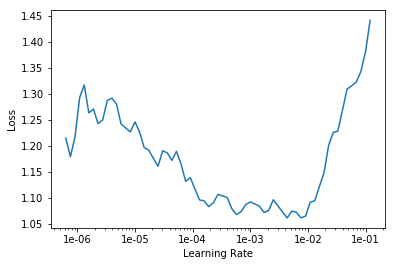

In [77]:
learn.lr_find()
learn.recorder.plot()

In [78]:
learn.fit_one_cycle(4, 1e-4)

epoch,train_loss,valid_loss,,time
0,0.903340,2.476063,0.725243,01:30
1,0.942238,2.475568,0.725243,01:19
2,0.926973,2.472093,0.725153,01:19


KeyboardInterrupt: 